### 用户数据产生

In [14]:
from faker import Faker
import pandas as pd
import numpy as np
from collections import OrderedDict
fake = Faker(locale='zh_CN')
sex_dict = OrderedDict([('男', 0.52), ('女', 0.48)])
married_dict = OrderedDict([('未婚', 0.4), ('已婚', 0.5), ('离异', 0.1), ])
work_dict = OrderedDict([('在职', 0.7), ('自由职业', 0.3), ])
type_dict = OrderedDict([('白领', 0.45), ('教师', 0.1), ('工人', 0.2), ('公务员', 0.1), ('销售', 0.15)])
name = []
age = []
address = []
sex = []
work = []
married = []
type = []
# 生成人数
num = 1000
# 生成name age address 
for i in range(num):
    name.append(fake.name())
    age.append(fake.random_int(min=16,max=45))
    address.append(fake.province())
    sex.append(fake.random_element(sex_dict))
    work.append(fake.random_element(work_dict))
    type.append(fake.random_element(type_dict))
    married.append(fake.random_element(married_dict))
data = {'name':name,'age':age,'sex':sex,'address':address,'work':work,'married':married,'type':type}
users = pd.DataFrame.from_dict(data)
users

,name,age,sex,address,work,married,type
0,龙春梅,41,男,湖北省,自由职业,未婚,白领
1,彭勇,18,女,内蒙古自治区,在职,已婚,销售
2,钱萍,24,女,江西省,在职,已婚,公务员
3,李浩,25,女,河南省,在职,未婚,白领
4,鲍楠,42,男,澳门特别行政区,在职,未婚,公务员
...,...,...,...,...,...,...,...
995,李娟,41,男,湖北省,在职,已婚,工人
996,徐宇,24,女,安徽省,自由职业,已婚,教师
997,李波,45,女,湖北省,自由职业,已婚,白领
998,杨佳,45,男,陕西省,自由职业,未婚,白领


### 用户数据处理

In [15]:
sex_map = {'男':0, '女':1}
married_map = {'未婚':0,'已婚':1,'离异':2}
work_map = {'在职':0, '自由职业':1}
type_map = {'白领':0,'教师':1,'工人':2,'公务员':3,'销售':4}
addr_map = {'上海市':0,'云南省':1,'内蒙古自治区':2,'北京市':3,'台湾省':4,'吉林省':5,'四川省':6,'天津市':7,'宁夏回族自治区':8
            ,'安徽省':9,'山东省':10,'山西省':11,'广东省':12,
            '广西壮族自治区':13,'新疆维吾尔自治区':14,'江苏省':15,'江西省':16,'河北省':17,'河南省':18,'浙江省':19,'海南省':20,'湖北省':21,'湖南省':22,'澳门特别行政区':23,'甘肃省':24,
            '福建省':25,'西藏自治区': 26,'贵州省':27,'辽宁省':28,'重庆市':29,'陕西省':30,'青海省':31,'香港特别行政区':32,'黑龙江省':33}
users['married'] = users['married'].map(married_map)
users['sex'] = users['sex'].map(sex_map)
users['work'] = users['work'].map(work_map)
users['type'] = users['type'].map(type_map)
users['address'] = users['address'].map(addr_map)
users

,name,age,sex,address,work,married,type
0,龙春梅,41,0,21,1,0,0
1,彭勇,18,1,2,0,1,4
2,钱萍,24,1,16,0,1,3
3,李浩,25,1,18,0,0,0
4,鲍楠,42,0,23,0,0,3
...,...,...,...,...,...,...,...
995,李娟,41,0,21,0,1,2
996,徐宇,24,1,9,1,1,1
997,李波,45,1,21,1,1,0
998,杨佳,45,0,30,1,0,0


In [16]:
X = users.loc[:,'age':]
X = np.array(X)

### 用户画像聚类

In [17]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
# 对数据进行标准化操作
"""
意义：通过对数据的每一个维度的值进行重新调节，使得最终的数据向量落在 [0,1]区间内，经过标准化处理后，原始数据转化为无量纲化指标测评值，各指标值处于同一数量级别，可进行综合测评分析。

如果直接用原始指标值进行分析，就会突出数值较高的指标在综合分析中的作用，相对削弱数值水平较低指标的作用
"""
model = Pipeline([
    ('BN',preprocessing.StandardScaler()),('KMS',KMeans())
])
model.fit(X)
# 保存模型
joblib.dump(model,  "./model/model.pkl")

model = joblib.load("./model/model.pkl")

y_pred = model.predict(X)
# X_scaled = preprocessing.StandardScaler(X)
# model = KMeans(random_state=9)
# model.fit_predict(X_scaled)
# 添加聚类结果
users['lable'] = y_pred

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\longx\anaconda3\Lib\site-packages\sklearn\externals\__init__.py)

In [ ]:
model = joblib.load("./model/model.pkl")
y_pred = model.predict([X[0]])
y_pred

### 可视化聚类结果

In [13]:
users

,name,age,sex,address,work,married,type,lable
0,郭凯,30,0,7,0,0,2,1
1,蒋凯,19,1,8,0,0,0,6
2,王洋,42,0,16,1,1,0,3
3,秦欣,41,0,32,1,0,0,3
4,王帅,18,0,11,0,0,0,1
5,高明,16,1,29,0,0,0,6
6,张琴,16,0,30,0,1,0,0
7,郭桂英,19,1,15,1,1,4,5
8,王想,25,0,0,0,1,0,1
9,黄桂芳,26,0,21,0,1,2,0


KeyError: 'lable'

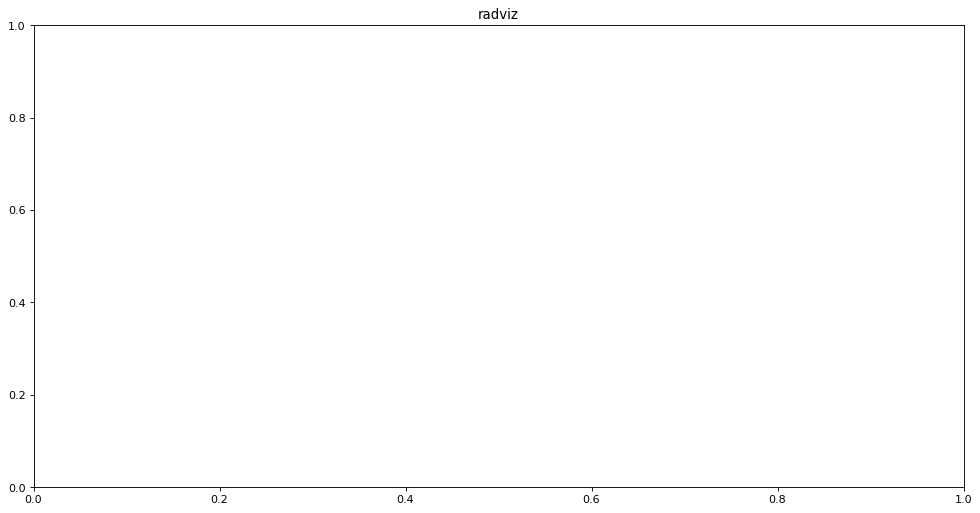

In [18]:
import matplotlib.pyplot as plt
from pandas.plotting import radviz
"""
adviz可视化原理是将一系列多维空间的点通过非线性方法映射到二维空间的可视化技术，是基于圆形平行坐标系的设计思想而提出的多维可视化方法。圆形的m条半径表示m维空间，使用坐标系中的一点代表多为信息对象，其实现原理参照物理学中物体受力平衡定理。
       mm维空间的点{Ai1,Ai2,...,AimAi1,Ai2,...,Aim}映射到二维可视空间的位置由弹簧引力分析模型确定。
      首先将一个圆等分成 mm份，等分点的个数由数据维度决定，记各等分点为{R1,R2,...,RnR1,R2,...,Rn}，每个等分点上固定一个弹簧，各个弹簧的弹性系数不同，弹簧 jj的弹性系数是AijAij，也就是第 jj维的值，所有mm个弹簧的另一端军固定在一个小圆上，如果这个小圆最终达到一个平衡位置 Bi={Xi,Yi}TBi={Xi,Yi}T，则弹力平衡点 {Xi,Yi}{Xi,Yi}就是m维空间点{ Ai1,Ai2,...,AimAi1,Ai2,...,Aim}在二维空间的投影点。
      博客：https://blog.csdn.net/Haiyang_Duan/article/details/78985225
"""
plt.figure('用户画像聚类',figsize=(15, 7.5), dpi=80)
plt.title('radviz')
radviz(users.loc[:,'age':], class_column='lable')
plt.show()